<a href="https://colab.research.google.com/github/harshkumar07/MaleriaDetection_ML/blob/main/Malaria_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow-gpu==2.10.0rc0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.1/578.1 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 100.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 77.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 66.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 39.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 61.7 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorfl

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout

from tensorflow.keras.preprocessing.image import ImageDataGenerator


print(tf.__version__)

2.10.0-rc0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!git clone https://github.com/laxmimerit/Malaria-Classification-Using-CNN.git

Cloning into 'Malaria-Classification-Using-CNN'...
remote: Enumerating objects: 27577, done.
remote: Total 27577 (delta 0), reused 0 (delta 0), pack-reused 27577
Receiving objects: 100% (27577/27577), 331.67 MiB | 17.01 MiB/s, done.
Resolving deltas: 100% (3/3), done.
Updating files: 100% (27562/27562), done.


In [ ]:
img_width=64
img_height =64

In [ ]:
datagen = ImageDataGenerator(rescale=1/255.0,validation_split=0.2)

In [ ]:
train_data_generator=datagen.flow_from_directory(directory='/content/Malaria-Classification-Using-CNN/malaria-dataset',
                                                 target_size=(img_width,img_height),
                                                 class_mode='binary',
                                                 batch_size=16,
                                                 subset='training')

Found 22048 images belonging to 2 classes.


In [ ]:
validation_data_generator=datagen.flow_from_directory(directory='/content/Malaria-Classification-Using-CNN/malaria-dataset',
                                                 target_size=(img_width,img_height),
                                                 class_mode='binary',
                                                 batch_size=16,
                                                 subset='validation')

Found 5510 images belonging to 2 classes.


In [ ]:
train_data_generator.labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
model=Sequential()

model.add(Conv2D(16,(3,3),input_shape=(img_width,img_height,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 31, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 32)        0

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [ ]:
history=model.fit_generator(generator=train_data_generator,
                            steps_per_epoch=len(train_data_generator),
                            epochs=5,
                            validation_data=validation_data_generator,
                            validation_steps=len(validation_data_generator))

Epoch 1/5


<ipython-input-13-27f714536df9>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(generator=train_data_generator,


1378/1378 [==============================] - 88s 63ms/step - loss: 0.5829 - accuracy: 0.6872 - val_loss: 0.2559 - val_accuracy: 0.9194
Epoch 2/5
1378/1378 [==============================] - 85s 62ms/step - loss: 0.2477 - accuracy: 0.9141 - val_loss: 0.1899 - val_accuracy: 0.9328
Epoch 3/5
1378/1378 [==============================] - 85s 61ms/step - loss: 0.1985 - accuracy: 0.9282 - val_loss: 0.1924 - val_accuracy: 0.9303
Epoch 4/5
1378/1378 [==============================] - 85s 62ms/step - loss: 0.1798 - accuracy: 0.9417 - val_loss: 0.2488 - val_accuracy: 0.9152
Epoch 5/5
1378/1378 [==============================] - 86s 62ms/step - loss: 0.1656 - accuracy: 0.9482 - val_loss: 0.1744 - val_accuracy: 0.9381


In [ ]:
history.history

{'loss': [0.5828714966773987,
  0.24765831232070923,
  0.19853471219539642,
  0.17984150350093842,
  0.16557364165782928],
 'accuracy': [0.6871824860572815,
  0.9141418933868408,
  0.9281567335128784,
  0.9416727423667908,
  0.9482492804527283],
 'val_loss': [0.2559449076652527,
  0.18991228938102722,
  0.1924431324005127,
  0.24884183704853058,
  0.17440277338027954],
 'val_accuracy': [0.9194192290306091,
  0.9328493475914001,
  0.9303085207939148,
  0.915244996547699,
  0.9381124973297119]}

In [ ]:
def plot_learningCurve(history, epoch):
  #plot training and validation accuracy values
  epoch_range=range(1,epoch+1)
  plt.plot(epoch_range,history.history['accuracy'])
  plt.plot(epoch_range,history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train','Val'],loc='upper left')
  plt.show()

  #plot training and validation loss values
  plt.plot(epoch_range,history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train','Val'],loc='upper left')
  plt.show()

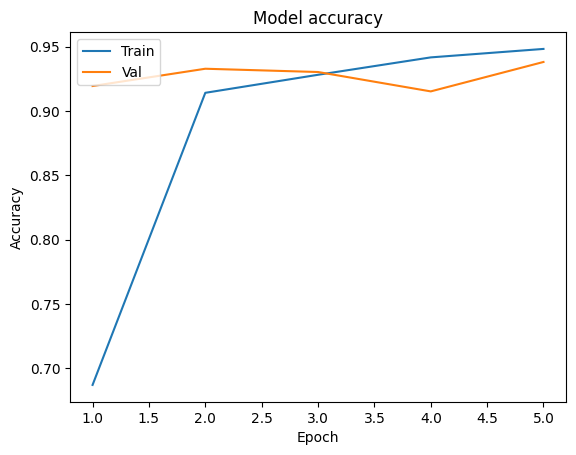

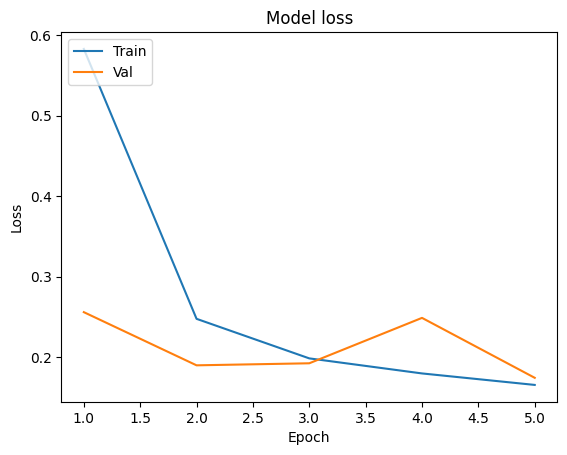

In [ ]:
plot_learningCurve(history, 5)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
model.save('/content/Malaria-Classification-Using-CNN')


In [ ]:
from tensorflow.keras.models import load_model

# Load saved model
model = load_model('/content/Malaria-Classification-Using-CNN')


In [ ]:
import os

print(os.path.exists('/content/Malaria-Classification-Using-CNN'))


True


In [ ]:
!pip install --upgrade tensorflow


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 52.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 54.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.4/302.4 kB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 44.6 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.6.1
    Uninstalling tensorboard-data-server-0.6.1:
      Successfully uninstalled tensorboard-data-server-0.6.1
  Attempting uninstall: protobuf
    Found existing installation: protobuf

In [ ]:
!pip install --upgrade keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from keras.models import load_model
from PIL import Image
import numpy as np

# Load saved model
model = load_model('/content/Malaria-Classification-Using-CNN')

# Load the image to be classified
img_path = '/content/drive/MyDrive/images.jpg'
img = Image.open(img_path).resize((64, 64))
x = np.asarray(img)
x = np.expand_dims(x, axis=0)

# Normalize the image
x = x / 255.0

# Make predictions
preds = model.predict(x)
if preds > 0.5:
    print("Uninfected")
    print("chill ur ass out till u get malaria and come back to us")
else:
    print("Infected")
    print("fucker stop looking at the screen and c a doctor")



Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 0s 76ms/step
Infected
fucker stop looking at the screen and c a doctor


In [ ]:
# Replace 'model' with the name of your model
model.save('/content/Malaria-Classification-Using-CNN')


In [ ]:
from google.colab import files
files.download('/content/Malaria-Classification-Using-CNN') # Replace 'model.h5' with the name of your saved model file


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>